In [121]:
import pandas as pd
import numpy as np

# Load each dataset
daily_steps = pd.read_csv('dailySteps_merged.csv')
daily_activity = pd.read_csv('dailyActivity_merged.csv')
daily_calories = pd.read_csv('dailyCalories_merged.csv')
daily_intensities = pd.read_csv('dailyIntensities_merged.csv')

# Inspect the first few rows and the column names of each dataset
datasets = [daily_steps, daily_activity, daily_calories, daily_intensities]
dataset_names = ['daily_steps', 'daily_activity', 'daily_calories', 'daily_intensities']

for name, dataset in zip(dataset_names, datasets):
    print(f"{name.upper()}:")
    print(dataset.head())
    print(dataset.columns.tolist())
    print("\n")


DAILY_STEPS:
           Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669
['Id', 'ActivityDay', 'StepTotal']


DAILY_ACTIVITY:
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0         

In [94]:
print(daily_steps.shape)
print(daily_activity.shape)
print(daily_calories.shape)
print(daily_intensities.shape)

(940, 3)
(940, 15)
(940, 3)
(940, 10)


In [95]:
# Preprocessing: Standardize the ActivityDay column name and convert to datetime format
daily_activity.rename(columns={'ActivityDate': 'ActivityDay'}, inplace=True)

# Convert ActivityDay to datetime in all datasets
for dataset in datasets:
    dataset['ActivityDay'] = pd.to_datetime(dataset['ActivityDay'])

# Merge datasets: Start with daily_activity as the base, then merge others one by one
# Using an outer join to ensure no data is missed
daily_merged_data = daily_activity.merge(daily_steps, on=['Id', 'ActivityDay'], how='outer', suffixes=('', '_steps'))

# Merging daily_calories
daily_merged_data = daily_merged_data.merge(daily_calories, on=['Id', 'ActivityDay'], how='outer', suffixes=('', '_calories'))

# Merging daily_intensities
daily_merged_data = daily_merged_data.merge(daily_intensities, on=['Id', 'ActivityDay'], how='outer', suffixes=('', '_intensities'))

# Check for duplicates based on Id and ActivityDay
duplicates = daily_merged_data.duplicated(subset=['Id', 'ActivityDay'], keep='first').sum()

# Overview of the merged dataset
merged_overview = {
    'Number of rows': daily_merged_data.shape[0],
    'Number of columns': daily_merged_data.shape[1],
    'Number of duplicates': duplicates
}

print(merged_overview)
daily_merged_data.head()


{'Number of rows': 940, 'Number of columns': 25, 'Number of duplicates': 0}


,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,StepTotal,Calories_calories,SedentaryMinutes_intensities,LightlyActiveMinutes_intensities,FairlyActiveMinutes_intensities,VeryActiveMinutes_intensities,SedentaryActiveDistance_intensities,LightActiveDistance_intensities,ModeratelyActiveDistance_intensities,VeryActiveDistance_intensities
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,10735,1797,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,10460,1776,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,9762,1745,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,12669,1863,773,221,10,36,0.0,5.04,0.41,2.71


In [122]:
daily_merged_data.to_csv('daily_merged_data.csv')

In [97]:
daily_merged_data.isnull().sum()

Id                                      0
ActivityDay                             0
TotalSteps                              0
TotalDistance                           0
TrackerDistance                         0
LoggedActivitiesDistance                0
VeryActiveDistance                      0
ModeratelyActiveDistance                0
LightActiveDistance                     0
SedentaryActiveDistance                 0
VeryActiveMinutes                       0
FairlyActiveMinutes                     0
LightlyActiveMinutes                    0
SedentaryMinutes                        0
Calories                                0
StepTotal                               0
Calories_calories                       0
SedentaryMinutes_intensities            0
LightlyActiveMinutes_intensities        0
FairlyActiveMinutes_intensities         0
VeryActiveMinutes_intensities           0
SedentaryActiveDistance_intensities     0
LightActiveDistance_intensities         0
ModeratelyActiveDistance_intensiti

In [98]:
daily_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Id                                    940 non-null    int64         
 1   ActivityDay                           940 non-null    datetime64[ns]
 2   TotalSteps                            940 non-null    int64         
 3   TotalDistance                         940 non-null    float64       
 4   TrackerDistance                       940 non-null    float64       
 5   LoggedActivitiesDistance              940 non-null    float64       
 6   VeryActiveDistance                    940 non-null    float64       
 7   ModeratelyActiveDistance              940 non-null    float64       
 8   LightActiveDistance                   940 non-null    float64       
 9   SedentaryActiveDistance               940 non-null    float64       
 10  Ve

In [99]:
df = pd.read_csv("daily_merged_data.csv", index_col=0)
df.head()

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,StepTotal,Calories_calories,SedentaryMinutes_intensities,LightlyActiveMinutes_intensities,FairlyActiveMinutes_intensities,VeryActiveMinutes_intensities,SedentaryActiveDistance_intensities,LightActiveDistance_intensities,ModeratelyActiveDistance_intensities,VeryActiveDistance_intensities
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,10735,1797,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,10460,1776,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,9762,1745,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,12669,1863,773,221,10,36,0.0,5.04,0.41,2.71


In [100]:
df.shape

(940, 25)

In [101]:
df.isnull().sum()

Id                                      0
ActivityDay                             0
TotalSteps                              0
TotalDistance                           0
TrackerDistance                         0
LoggedActivitiesDistance                0
VeryActiveDistance                      0
ModeratelyActiveDistance                0
LightActiveDistance                     0
SedentaryActiveDistance                 0
VeryActiveMinutes                       0
FairlyActiveMinutes                     0
LightlyActiveMinutes                    0
SedentaryMinutes                        0
Calories                                0
StepTotal                               0
Calories_calories                       0
SedentaryMinutes_intensities            0
LightlyActiveMinutes_intensities        0
FairlyActiveMinutes_intensities         0
VeryActiveMinutes_intensities           0
SedentaryActiveDistance_intensities     0
LightActiveDistance_intensities         0
ModeratelyActiveDistance_intensiti

In [102]:
duplicates = duplicates = df.duplicated(subset=['Id', 'ActivityDay'], keep='first').sum()
duplicates

0

In [103]:
# Convert 'ActivityDay' to datetime
df['ActivityDay'] = pd.to_datetime(df['ActivityDay'])

# Check for duplicate columns by comparing values in columns that seem to represent the same data
duplicate_columns = ['TotalSteps', 'StepTotal', 
                     'Calories_calories', 'Calories',
                     'SedentaryMinutes_intensities', 'LightlyActiveMinutes_intensities', 
                     'FairlyActiveMinutes_intensities', 'VeryActiveMinutes_intensities', 
                     'SedentaryActiveDistance_intensities', 'LightActiveDistance_intensities', 
                     'ModeratelyActiveDistance_intensities', 'VeryActiveDistance_intensities']

# Check if the data in the original and the corresponding "_intensities" columns are the same
for column in duplicate_columns:
    if column in df.columns:
        original_column = column.replace('_intensities', '').replace('calories', 'Calories')
        if original_column in df.columns:
            # Check if all values are equal
            all_equal = (df[original_column] == df[column]).all()
            print(f"Columns '{original_column}' and '{column}' are identical: {all_equal}")

# Based on the output, we will decide which duplicate columns to drop. Let's first check the equality.


Columns 'TotalSteps' and 'TotalSteps' are identical: True
Columns 'StepTotal' and 'StepTotal' are identical: True
Columns 'Calories' and 'Calories' are identical: True
Columns 'SedentaryMinutes' and 'SedentaryMinutes_intensities' are identical: True
Columns 'LightlyActiveMinutes' and 'LightlyActiveMinutes_intensities' are identical: True
Columns 'FairlyActiveMinutes' and 'FairlyActiveMinutes_intensities' are identical: True
Columns 'VeryActiveMinutes' and 'VeryActiveMinutes_intensities' are identical: True
Columns 'SedentaryActiveDistance' and 'SedentaryActiveDistance_intensities' are identical: True
Columns 'LightActiveDistance' and 'LightActiveDistance_intensities' are identical: True
Columns 'ModeratelyActiveDistance' and 'ModeratelyActiveDistance_intensities' are identical: True
Columns 'VeryActiveDistance' and 'VeryActiveDistance_intensities' are identical: True


In [104]:
# Remove duplicate columns
columns_to_remove = [col for col in df.columns if '_intensities' in col or col == 'StepTotal' or col == 'Calories_calories']
data_cleaned = df.drop(columns=columns_to_remove)

# Check for missing values
missing_values = data_cleaned.isnull().sum()
missing_values

Id                          0
ActivityDay                 0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [113]:
# check the datatype of all the colimns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id                                    940 non-null    int64         
 1   activityday                           940 non-null    datetime64[ns]
 2   totalsteps                            940 non-null    int64         
 3   totaldistance                         940 non-null    float64       
 4   trackerdistance                       940 non-null    float64       
 5   loggedactivitiesdistance              940 non-null    float64       
 6   veryactivedistance                    940 non-null    float64       
 7   moderatelyactivedistance              940 non-null    float64       
 8   lightactivedistance                   940 non-null    float64       
 9   sedentaryactivedistance               940 non-null    float64       
 10  ve

In [105]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(r'([a-z])([A-Z])', r'\1_\2').str.replace(r'[^a-z0-9_]', '', regex=True)

# Display the first few rows of the dataframe to verify the new column names
df.head()

C:\Users\nishant32\AppData\Local\Temp\ipykernel_15376\3852263842.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.lower().str.replace(r'([a-z])([A-Z])', r'\1_\2').str.replace(r'[^a-z0-9_]', '', regex=True)


,id,activityday,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,...,steptotal,calories_calories,sedentaryminutes_intensities,lightlyactiveminutes_intensities,fairlyactiveminutes_intensities,veryactiveminutes_intensities,sedentaryactivedistance_intensities,lightactivedistance_intensities,moderatelyactivedistance_intensities,veryactivedistance_intensities
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,10735,1797,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,10460,1776,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,9762,1745,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,12669,1863,773,221,10,36,0.0,5.04,0.41,2.71


In [135]:
# Convert 'activityday' to datetime format
df['activityday'] = pd.to_datetime(df['activityday'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id                                    940 non-null    int64         
 1   activityday                           940 non-null    datetime64[ns]
 2   totalsteps                            940 non-null    int64         
 3   totaldistance                         940 non-null    float64       
 4   trackerdistance                       940 non-null    float64       
 5   loggedactivitiesdistance              940 non-null    float64       
 6   veryactivedistance                    940 non-null    float64       
 7   moderatelyactivedistance              940 non-null    float64       
 8   lightactivedistance                   940 non-null    float64       
 9   sedentaryactivedistance               940 non-null    float64       
 10  ve

Exploratory Data Analysis (daily)

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df.head()

,id,activityday,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,...,steptotal,calories_calories,sedentaryminutes_intensities,lightlyactiveminutes_intensities,fairlyactiveminutes_intensities,veryactiveminutes_intensities,sedentaryactivedistance_intensities,lightactivedistance_intensities,moderatelyactivedistance_intensities,veryactivedistance_intensities
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,10735,1797,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,10460,1776,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,9762,1745,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,12669,1863,773,221,10,36,0.0,5.04,0.41,2.71


In [136]:
# Provide summary statistics
summary_statistics = df.describe()
summary_statistics

,id,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,...,steptotal,calories_calories,sedentaryminutes_intensities,lightlyactiveminutes_intensities,fairlyactiveminutes_intensities,veryactiveminutes_intensities,sedentaryactivedistance_intensities,lightactivedistance_intensities,moderatelyactivedistance_intensities,veryactivedistance_intensities
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,...,7637.910638,2303.609574,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,...,5087.150742,718.166862,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,...,3789.750000,1828.500000,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,...,7405.500000,2134.000000,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,...,10727.000000,2793.250000,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,...,36019.000000,4900.000000,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000


Scatter Plot

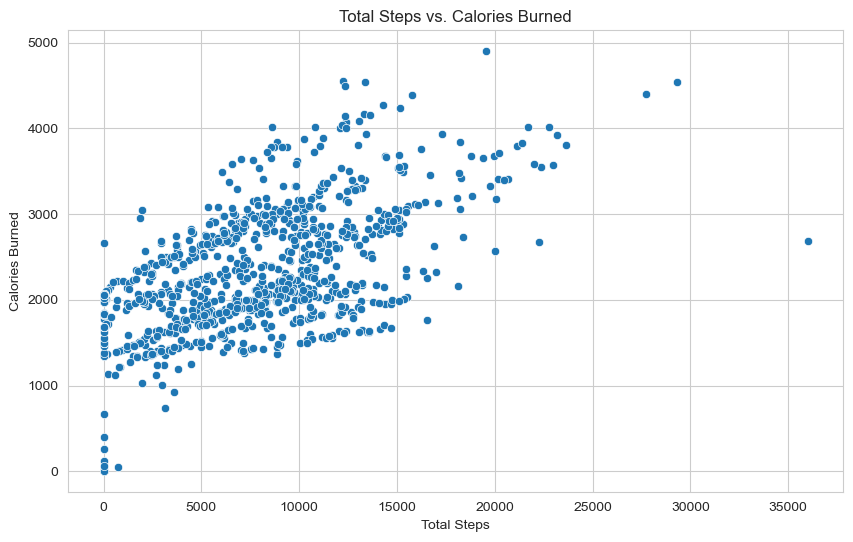

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totalsteps', y='calories', data=df)
plt.title('Total Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.show()

A positive correlation between the two variables can be seen in the scatter plot of Total Steps vs. Calories Burned, suggesting that as steps taken increase, so do the calories burned. This link makes sense because increasing physical activity (in steps) should logically result in increasing energy consumption.

The figure displays a wide range of data points, indicating individual differences in the conversion of steps to calories burned. This fluctuation may result from variables like individual metabolic rates, variations in step intensity (e.g., walking vs. running), or errors in step or calorie measuring techniques.

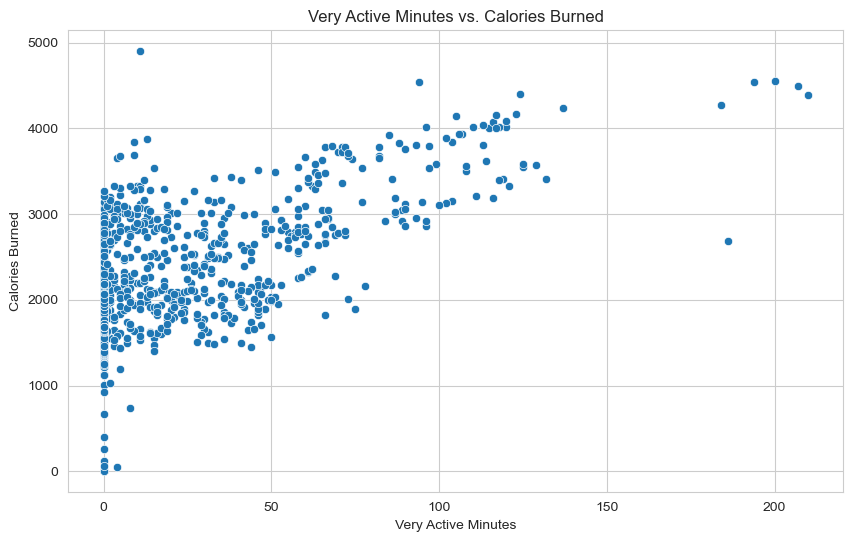

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='veryactiveminutes', y='calories', data=df)
plt.title('Very Active Minutes vs. Calories Burned')
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories Burned')
plt.show()

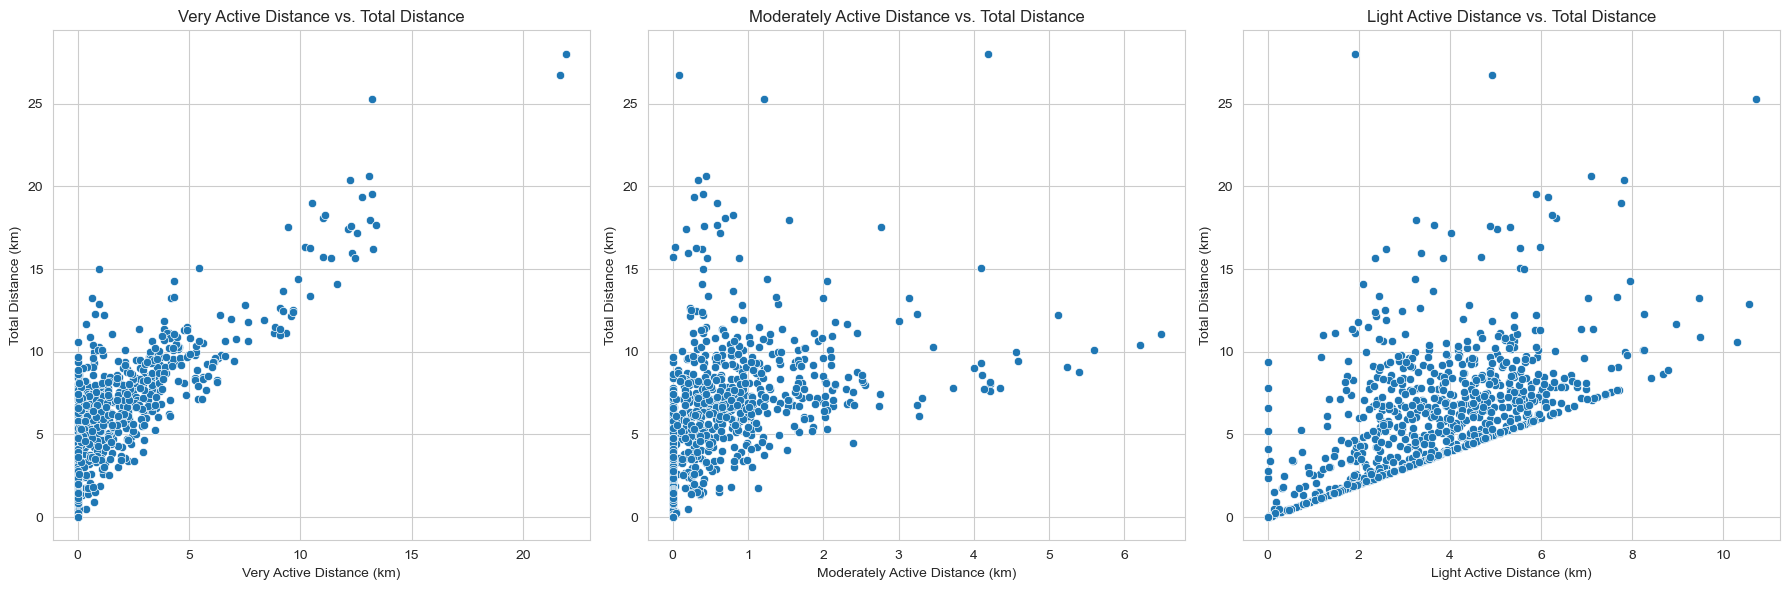

In [132]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Very Active Distance vs. Total Distance
plt.subplot(1, 3, 1)
sns.scatterplot(x='veryactivedistance', y='totaldistance', data=df)
plt.title('Very Active Distance vs. Total Distance')
plt.xlabel('Very Active Distance (km)')
plt.ylabel('Total Distance (km)')

# Moderately Active Distance vs. Total Distance
plt.subplot(1, 3, 2)
sns.scatterplot(x='moderatelyactivedistance', y='totaldistance', data=df)
plt.title('Moderately Active Distance vs. Total Distance')
plt.xlabel('Moderately Active Distance (km)')
plt.ylabel('Total Distance (km)')

# Light Active Distance vs. Total Distance
plt.subplot(1, 3, 3)
sns.scatterplot(x='lightactivedistance', y='totaldistance', data=df)
plt.title('Light Active Distance vs. Total Distance')
plt.xlabel('Light Active Distance (km)')
plt.ylabel('Total Distance (km)')

plt.tight_layout()
plt.show()


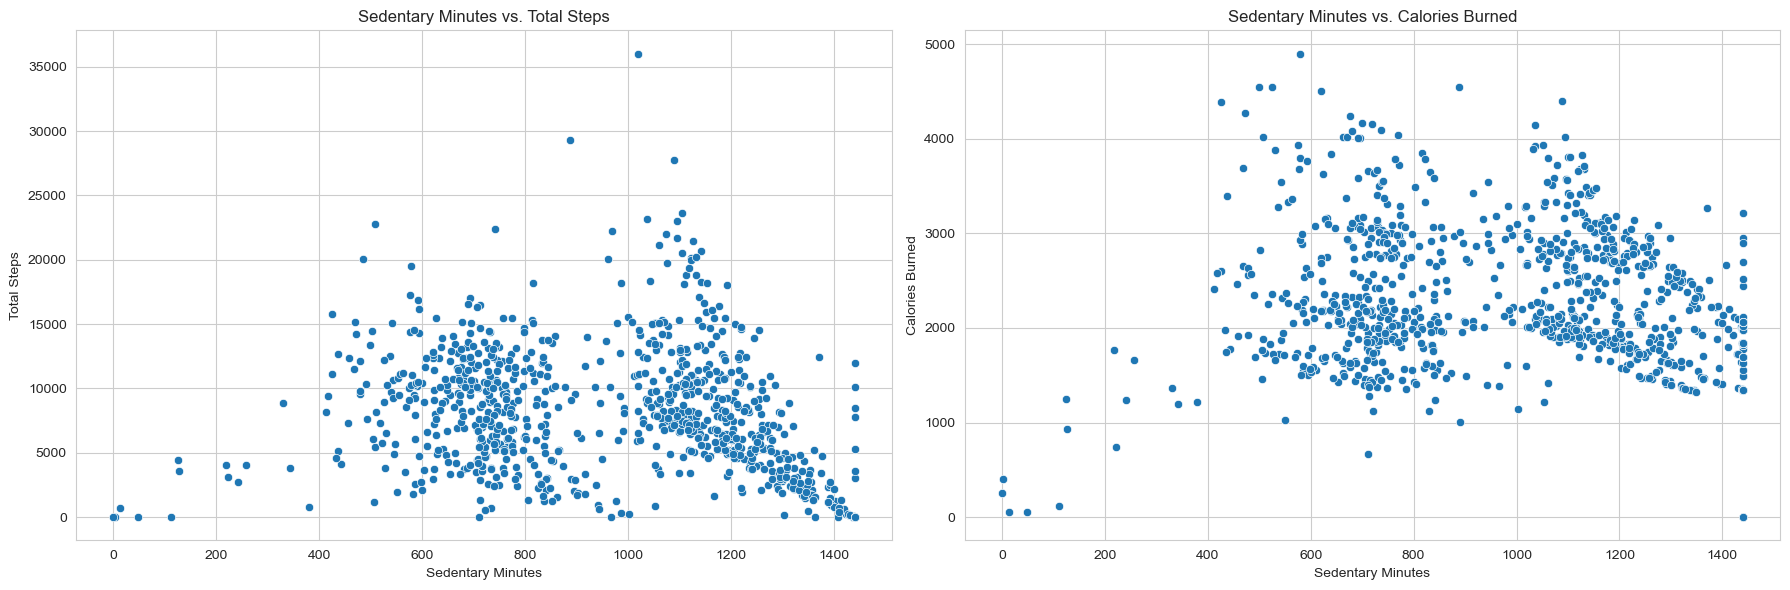

In [133]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Sedentary Minutes vs. Total Steps
plt.subplot(1, 2, 1)
sns.scatterplot(x='sedentaryminutes', y='totalsteps', data=df)
plt.title('Sedentary Minutes vs. Total Steps')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Total Steps')

# Sedentary Minutes vs. Calories Burned
plt.subplot(1, 2, 2)
sns.scatterplot(x='sedentaryminutes', y='calories', data=df)
plt.title('Sedentary Minutes vs. Calories Burned')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Calories Burned')

plt.tight_layout()
plt.show()


Conclusion: 

The EDA revealed valuable insights into the dynamics of physical activity and its relationship with health metrics like calories burned.

Tracking activities appears beneficial in promoting higher activity levels, while the balance between active and sedentary periods emerges as a critical factor for health.

The limitations encountered, particularly around seasonal analysis, highlight the importance of comprehensive data coverage for more detailed insights.